# Chapter 2 Graphs

In [68]:
# Set 
import networkx as nx 
import numpy as np

In [58]:
# Directed Graph
G = nx.DiGraph()

# Nodes to the graph 
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')

# view the nodes 
list(G.nodes())

['Alice', 'Bob', 'Chuck']

In [59]:
# Adding edges to the graph

G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')

# view edges 
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

This returns a `NodeView` which is effectivly a list of pairs, one for each edge within the network. We can use this to iterate over the network using a foor loop.



## Functions for drawing Graphs 

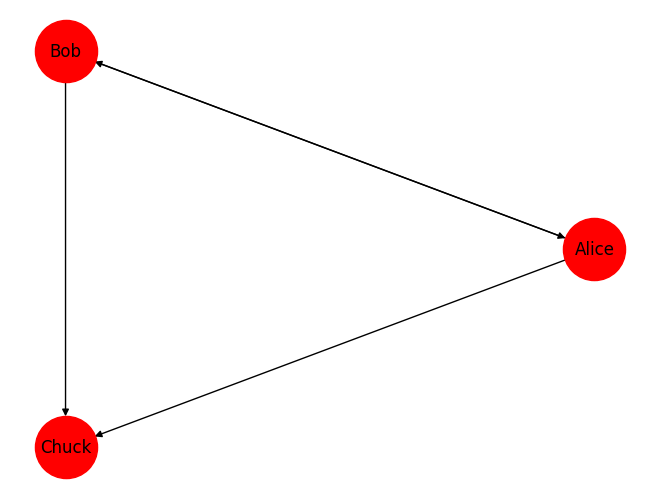

In [67]:
# Using draw_circular to drasw the graph 

nx.draw_circular(G,
                 node_size=2000,
                 node_color = {"red"},
                 with_labels=True)

Lets generate a geographical graph that plots cities.

In [41]:
# to craete a graph of cities we can create a dictionary of cities 
# mapped to their longditude and latitude 
positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))

# craete an undirected graph as diection doesent matter here 
G = nx.Graph()

# Add the nodes to the graph 
G.add_nodes_from(positions)


In [42]:
# we can map onto this graph the drive times between cities 
# creating  a  dictionary 
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

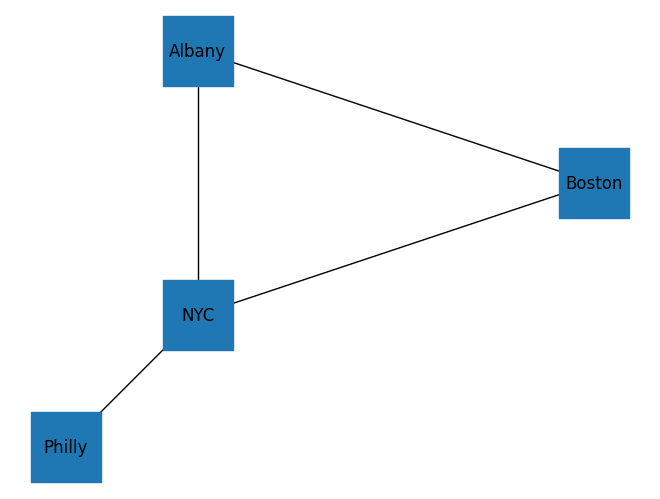

In [43]:
# we can iterate through these keys using add_edges_from
G.add_edges_from(drive_times)

# Use the draw function as this arrages nodes based on their position in the 
# second parameter 
nx.draw(G, positions,
        node_shape='s',
        node_size=2500,
        with_labels=True)

## Random Graphs and Generating Graphs 
We can use Graph generation to create random graphs with different levels of probablility. The Erdos-Renyi random graphs consist of two peoperties $n$ which is the number of nodes and $p$ which is the probbaility of an edge between any two nodes. The key point of the work on random graphs by Erdos and Renyi is that graphs have a critical point: 

$$ p^* = \frac{ln(n)}{n} $$

where $p^*$ is the critical value for graph $G(n,p)$. Below this value graphs are unlikely to be connected - that is have a path from every node to every other node - and above this point it is highly likley. 

We can test this by doveloping algorythums to generate random graphs.

In [44]:
# Lets generate a compleate graph 

# this function takes a list of nodes and enuerates all distinct pairs 
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield u, v

In [45]:
# We can use all_pairs to construct a complete graph:

def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

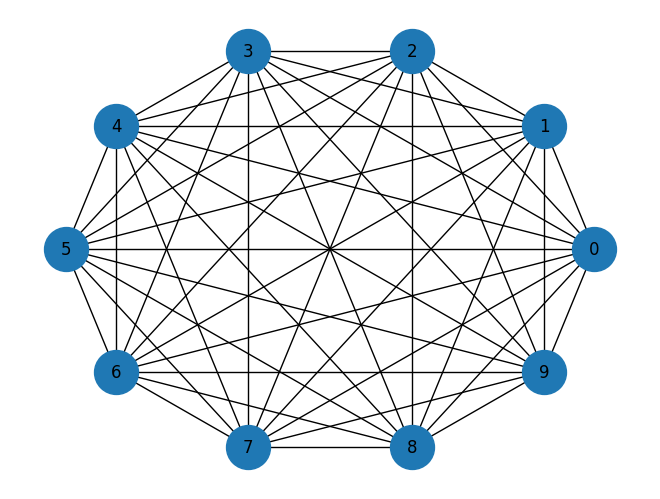

In [46]:
# The following code makes a complete graph with 10 nodes and draws it:

complete = make_complete_graph(10)

nx.draw_circular(complete,
                 node_size=1000,
                 with_labels=True)

## Connected Graphs
Connected graphs have a path between any two set of nodes, although this could be thorugh other nodes. We can use an anlorythum to check wheather this is true. 
You can start at any node and check whether you can reach all other nodes. If you can reach a node, v, you can reach any of the neighbors of v, which are the nodes connected to v by an edge.

In [53]:
# Graph class objects provide a funtion called naiebors that return 
# a lists of neigbors for a given node 

complete.neighbors(0)


In [54]:
# reachable_nodes takes a Graph and a starting node, start,
# and returns the set of nodes that can be reached from start.

def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

# test 
reachable_nodes(complete, 0) # here all nodes are reachable 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [56]:
# We can use reachable_nodes to write is_connected:

def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

# is_connected chooses a starting node by making a node iterator and 
# choosing the first element. 
# If the size of this set is the same as the size of the graph, 
# that means we can reach all nodes, which means the graph is connected.

is_connected(complete)

True

## Generating ER Graphss 



In [70]:
# creating random pairs  

# The following generator function enumerates all possible edges
# and chooses which ones should be added to the graph:


def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

# random_pairs uses flip:
def flip(p):
    return np.random.random() < p
# NumPy provides a module named random, which provides a method named random,
# which returns a number between 0 and 1, uniformly distributed
# Note. Even though flip is defined after random_pairs python will still run

# Make_random_graph generates and returns the ER graph G(n, p):

def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))


# make_random_graph is almost identical to make_complete_graph
# the only difference is that it uses random_pairs instead of all_pairs

False

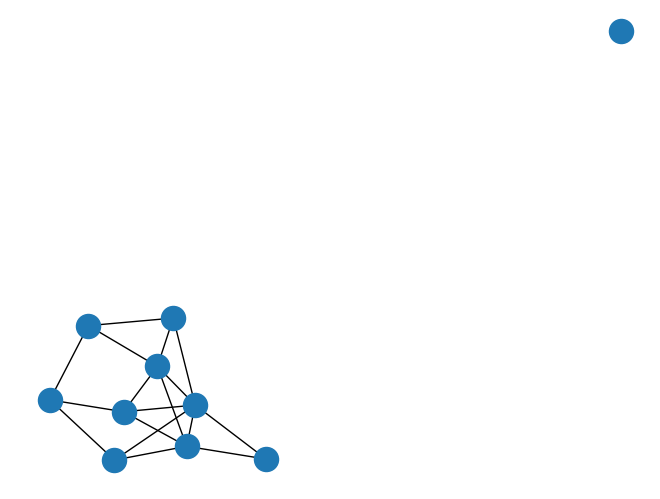

In [103]:
# Generate a random graph with a p=0.3 

random_graph = make_random_graph(10, 0.3)
nx.draw(random_graph)
is_connected(random_graph)


For given values of n and p, we would like to know the probability that G(n, p) is connected. We can estimate it by generating a large number of random graphs and counting how many are connected. Here’s how:

In [107]:
# testing the probability a graph is connected 

def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
          for i in range(iters)]
    return np.mean(bool)

In [111]:
prob_connected(10, 3, iters=1000)

TypeError: unsupported operand type(s) for /: 'type' and 'int'